
# **Import libraries**#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Import, mod and export csv**




In [2]:
hapiness=pd.read_csv("hapiness_2018.csv")
suicides=pd.read_csv("suicides.csv")

#suicides['Country'] = suicides['Country'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

#suicides.to_csv("suicides_mod.csv", index=False)#create a new file with the mod csv, without the first column of indexes

hapiness.head(100)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
95,96,Indonesia,5.093,0.899,1.215,0.522,0.538,0.484,0.018
96,97,Bhutan,5.082,0.796,1.335,0.527,0.541,0.364,0.171
97,98,Somalia,4.982,0.000,0.712,0.115,0.674,0.238,0.282
98,99,Cameroon,4.975,0.535,0.891,0.182,0.454,0.183,0.043


In [ ]:
#take only the country and the score of both

hapiness=hapiness[['Country or region', 'Score']]
suicides=suicides[['Country','2018']]
hapiness.rename(columns = {'Country or region':'Country'}, inplace = True)
#plt.plot(hapiness["Score"], suicides["2018"])

#if 'Spain' in hapiness["Country or region"].values :
 #   print("\nThis value exists in Dataframe")
 #
#else :
 #   print("\nThis value does not exists in Dataframe")

<ipython-input-8-792d334b7575>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hapiness.rename(columns = {'Country or region':'Country'}, inplace = True)


In [ ]:
hapiness=hapiness.sort_values('Country', ascending=True)#order hapiness by alpahbet, not index
hapiness.head(100)

,Country,Score
144,Afghanistan,3.632
111,Albania,4.586
83,Algeria,5.295
141,Angola,3.795
28,Argentina,6.388
...,...,...
122,Mozambique,4.417
129,Myanmar,4.308
118,Namibia,4.441
100,Nepal,4.880


In [ ]:
df = pd.merge(suicides, hapiness, how='outer', indicator=True)#make the list of the two
df=df.loc[df._merge == 'both', ['Country']]#take only both country
df.loc[:,"Country"].unique()#print the array with both countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Ivory Coast', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 'Lithuania'

In [ ]:
#hapiness.insert(loc=0, column='Suicides', value=suicides["2018"])#insert suicides into values
hapiness=hapiness.set_index("Country")
suicides=suicides.set_index("Country")
#hapiness["Suicides"]=suicides["2018"]

In [ ]:
#hapiness["Suicides"]=suicides["2018"]
#hapiness.head(100)
merged_df = pd.merge(hapiness, suicides, left_index=True, right_index=True)#merge the two dataframes with only the values that are in both
print(merged_df)
#hapiness.to_csv("BOTH.csv")

             Score  2018
Country                 
Afghanistan  3.632   5.9
Albania      4.586   3.9
Algeria      5.295   2.6
Angola       3.795  12.4
Argentina    6.388   9.0
...            ...   ...
Venezuela    4.806   2.2
Vietnam      5.103   7.4
Yemen        3.355   7.1
Zambia       4.377  15.9
Zimbabwe     3.692  23.9

[148 rows x 2 columns]


In [ ]:
merged_df.rename(columns = {'Score':'Index_Hapiness'}, inplace = True)
merged_df.rename(columns = {'2018':'Suicide_Rates'}, inplace = True)
merged_df.head(100)

,Index_Hapiness,Suicide_Rates
Country,,
Afghanistan,3.632,5.9
Albania,4.586,3.9
Algeria,5.295,2.6
Angola,3.795,12.4
Argentina,6.388,9.0
...,...,...
Netherlands,7.441,9.1
New Zealand,7.324,10.7
Nicaragua,6.141,5.0


In [ ]:
merged_df.to_csv("BOTH.csv")

In [ ]:
#one way that i tried to combine both but it doesnt work
df = pd.merge(suicides, hapiness, how='outer', indicator=True)
df=df.loc[df._merge == 'both', ['Country']]
def country_finded(country):
  for i in df["Country"]:
    if i == country:
      return True
  return False

for i in range(suicides["Country"].count()):
  if country_finded(suicides["Country"][i])==False:
    suicides = suicides.drop(i)
  
for i in range(hapiness["Country"].count()):
  if country_finded(hapiness["Country"][i])==False:
    hapiness = hapiness.drop(i)
  

# **Plot the data**

In [ ]:
df=pd.read_csv("BOTH.csv")
df = df.drop('Unnamed: 0', axis=1)
#df.rename(columns = {'Rates':'Suicides', 'Score':'Index_Hapiness'}, inplace = True)
df.tail(5)

,Country,Index_Hapiness,Suicide_Rates
142,Venezuela,4.806,2.2
143,Vietnam,5.103,7.4
144,Yemen,3.355,7.1
145,Zambia,4.377,15.9
146,Zimbabwe,3.692,23.9


In [ ]:
def swap_columns(df, col1, col2):#swap 2 cols of a pandas df
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df
df=swap_columns(df,'Suicides','Country')
df.head(5)

ValueError: ignored

In [ ]:
df.to_csv("BOTH.csv")

In [ ]:
condition = df['Country'] != 'Lesotho'
df = df[condition]
#df.tail(5)
#df.to_csv("BOTH.csv")

#df['Index_Hapiness'] = df['Index_Hapiness'] * 3

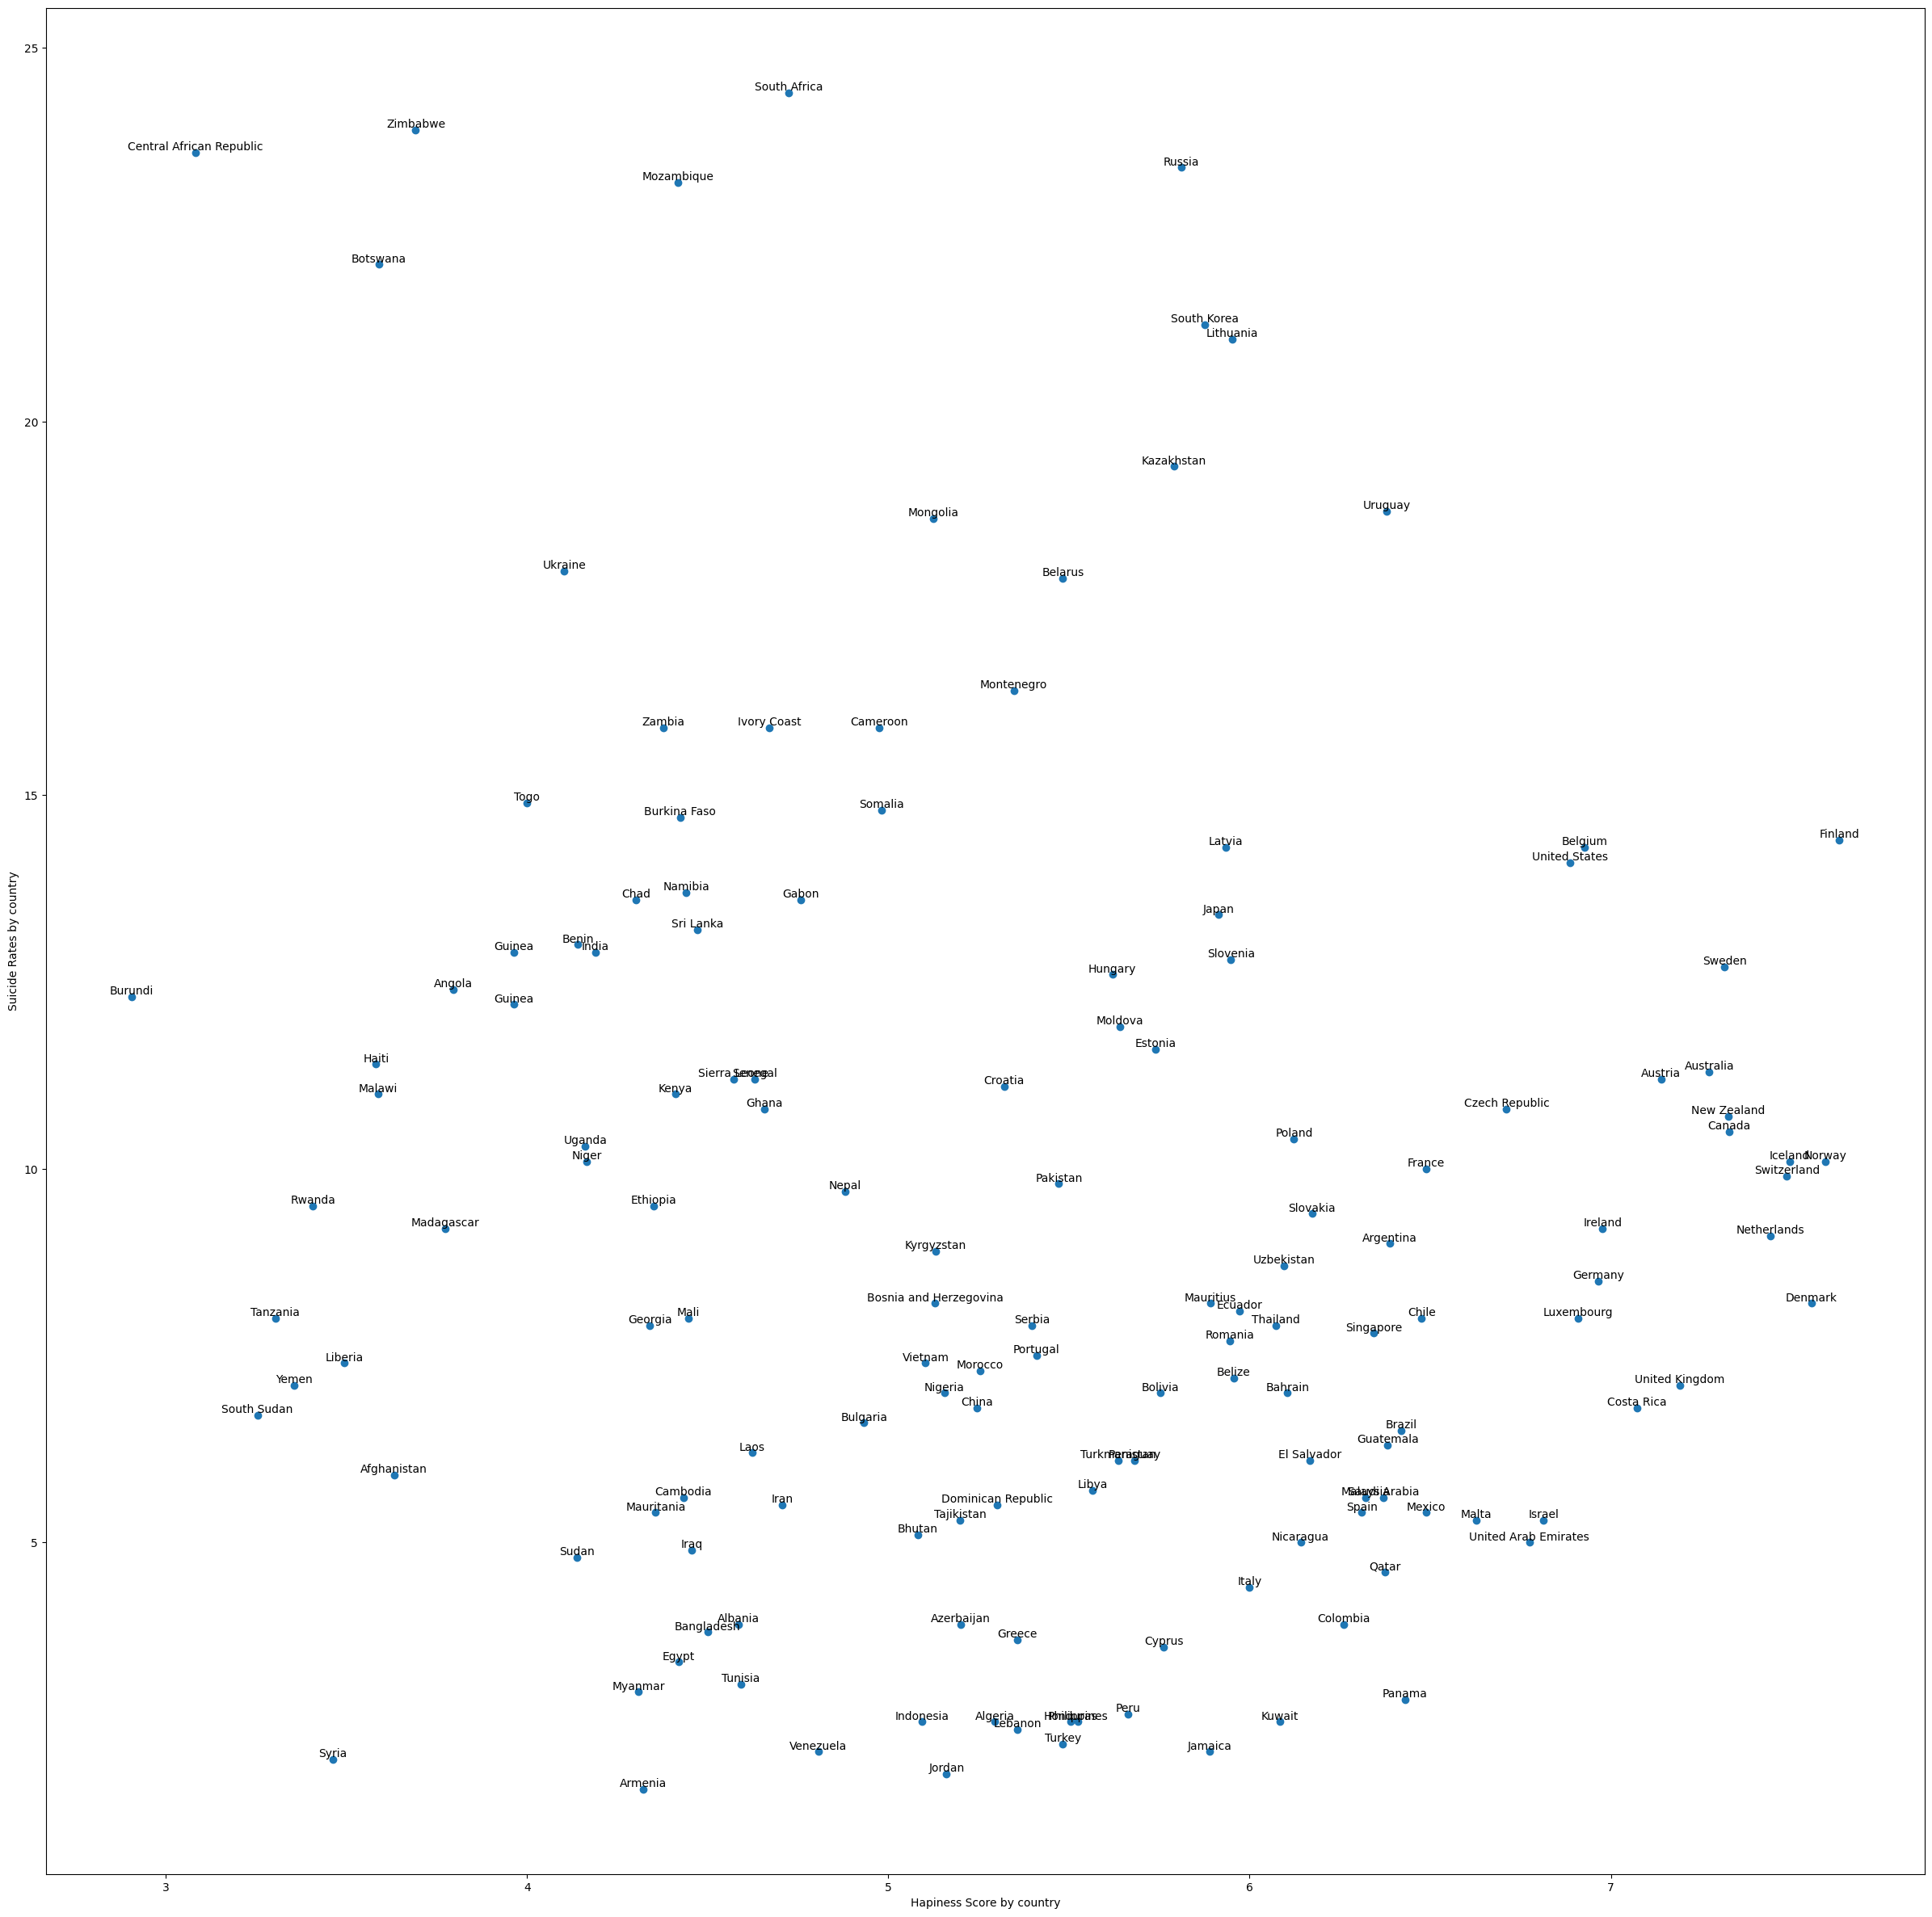

In [ ]:

plt.figure(figsize=(30,30))
plt.xlabel("Hapiness Score by country")
plt.ylabel("Suicide Rates by country")
plt.scatter(df["Index_Hapiness"], df["Suicide_Rates"])
cont=0

for (xi, yi) in zip(df["Index_Hapiness"], df["Suicide_Rates"]):
    plt.text(xi, yi, df["Country"][cont], va='bottom', ha='center')
    cont+=1

#plt.text(df.Index_Hapiness[df["Country"]=="India"],df["Suicide_Rates"][df.Country=="India"],"India", color='red')
#plt.savefig("photo.png",dpi=300)
#plt.plot(hapiness["Score"], suicides["2018"],'ro')
plt.show()

# **Algorithm(linear regresion) to know the happiest country(MINE)**

Regresion lineal simple, esta regresion lineal usa la funcion y=a+bX, Y es la variable independiente, a es el término independiente, altura donde corta y, b es la pendiente

EL principal problema que ocurre con las nubes de puntos y la linea recta, es q hay mucha lineas q se prodian ajustar mejor o peor, por ello tenemos que encontrar LA MEJOR, la mejor linea tiene que cruzar lo mas cerca posible de todos los puntos, es decir la suma de los cuadrados de las distancias verticales a la recta tiene q ser tan peque;a como se pueda, la diferencia entre punto y recta se llama error o resivo, lo que buscamos es que la suma de todos los errores sea tan peqeue;a como se pueda, y el metodo que se usa es el metodo de lso minimos cuadrados.

Realmente lo q queremos minimizar los errores, es y-yerror, es decir la diferencia entre distacnais, que no deja de ser, la y-a-bx, ya que yerror, es a-bx, es decir esa diferencia al cuadrado tiene que se minima. 



# **Algorithm(linear regression) to know the happiest country(CHAT-GPT)**

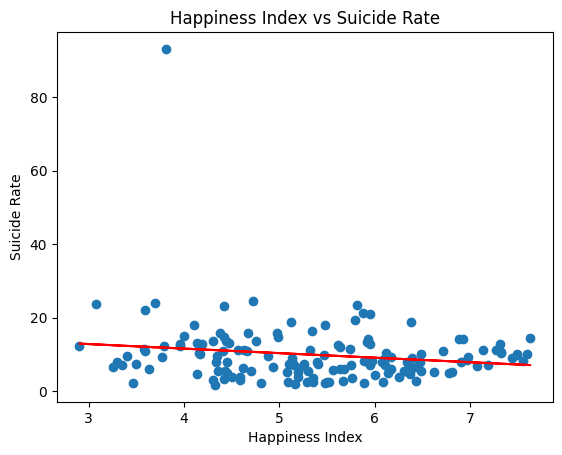

The happiest country with a predicted suicide rate below the regression line is United Kingdom with a happiness index of 7.19 and a predicted suicide rate of 7.64


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data into a pandas DataFrame
data = pd.read_csv('BOTH.csv')

# Create a scatter plot with happiness index on the x-axis and suicide rate on the y-axis
plt.scatter(data['Index_Hapiness'], data['Suicide_Rates'])

# Fit a linear regression model to the data
model = LinearRegression().fit(data[['Index_Hapiness']], data['Suicide_Rates'])

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Add the regression line to the plot
plt.plot(data['Index_Hapiness'], slope * data['Index_Hapiness'] + intercept, color='red')

# Label the axes and add a title
plt.xlabel('Happiness Index')
plt.ylabel('Suicide Rate')
plt.title('Happiness Index vs Suicide Rate')

# Show the plot
plt.show()

# Identify the country with the highest happiness index and a predicted suicide rate below the regression line
highest_happiness_country = ''
highest_happiness_index = 0
lowest_predicted_suicide_rate = float('inf')

for index, row in data.iterrows():
    happiness_index = row['Index_Hapiness']
    suicide_rate = row['Suicide_Rates']
    predicted_suicide_rate = model.predict([[happiness_index]])[0]
    
    if happiness_index > highest_happiness_index and suicide_rate < predicted_suicide_rate:
        highest_happiness_country = row['Country']
        highest_happiness_index = happiness_index
        lowest_predicted_suicide_rate = predicted_suicide_rate

print(f"The happiest country with a predicted suicide rate below the regression line is {highest_happiness_country} with a happiness index of {highest_happiness_index} and a predicted suicide rate of {lowest_predicted_suicide_rate:.2f}")
